In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel(r"/content/crop yield data sheet.xlsx")
df

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.dropna()

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rain Fall (mm),99.0,849.797980,400.042676,400.0,450.0,1150.0,1237.5,1300.0
Fertilizer,99.0,67.808081,10.028202,50.0,60.0,70.0,77.0,80.0
Nitrogen (N),99.0,70.737374,6.677079,59.0,65.0,71.0,77.0,80.0
Phosphorus (P),99.0,21.131313,1.951695,18.0,19.5,21.0,23.0,25.0
Potassium (K),99.0,18.060606,1.817254,15.0,16.0,19.0,19.0,22.0
Yeild (Q/acre),99.0,9.050505,1.965902,5.5,7.0,9.0,11.0,12.0


In [5]:
df.corr()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
Rain Fall (mm),1.000000,0.890318,-0.967291,0.875808,0.776814,0.810893,0.886721
Fertilizer,0.890318,1.000000,-0.864742,0.909786,0.816710,0.762152,0.833823
Temperatue,-0.967291,-0.864742,1.000000,-0.846513,-0.780556,-0.779570,-0.892425
Nitrogen (N),0.875808,0.909786,-0.846513,1.000000,0.778651,0.808640,0.879056
Phosphorus (P),0.776814,0.816710,-0.780556,0.778651,1.000000,0.748642,0.800094
Potassium (K),0.810893,0.762152,-0.779570,0.808640,0.748642,1.000000,0.856010
Yeild (Q/acre),0.886721,0.833823,-0.892425,0.879056,0.800094,0.856010,1.000000


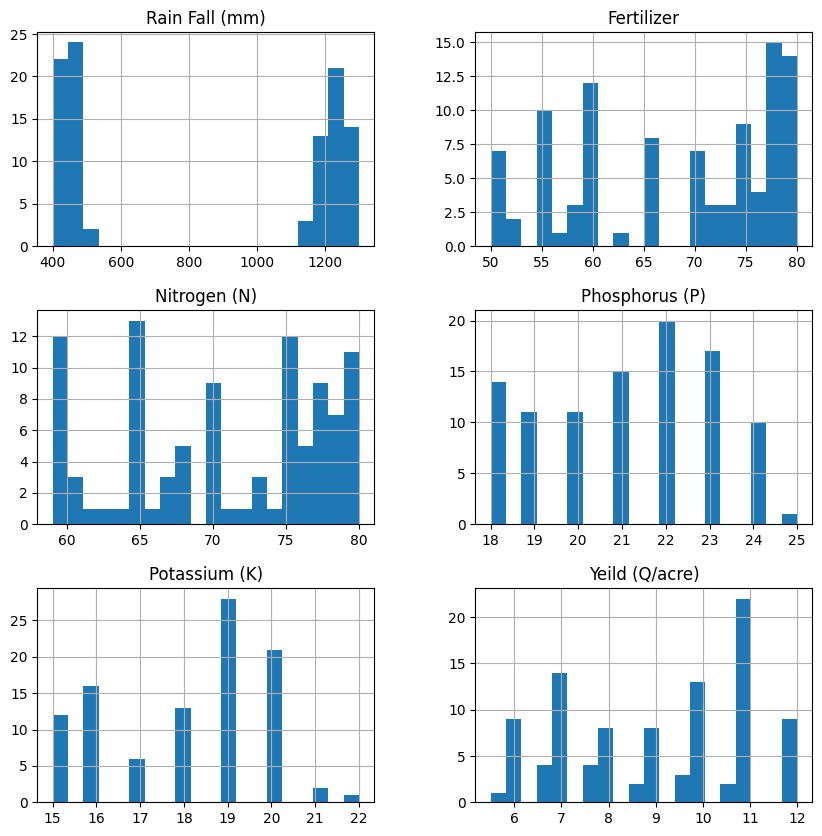

In [6]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [7]:
df_max_scaled = df.copy()
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()
display(df_max_scaled)

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,0.946154,1.0000,0.7,1.0000,0.96,0.909091,1.000000
1,0.369231,0.7500,0.9,0.8750,0.80,0.818182,0.666667
2,0.961538,0.9375,0.725,0.9750,0.88,0.863636,0.916667
3,0.346154,0.8125,0.875,0.8750,0.76,0.818182,0.750000
4,0.923077,1.0000,0.675,0.9875,0.88,0.863636,0.916667
...,...,...,...,...,...,...,...
94,0.961538,0.9625,0.7,0.9750,0.92,0.909091,0.750000
95,0.326923,0.7500,0.975,0.8125,0.76,0.772727,0.541667
96,0.938462,0.9875,0.7,0.9625,0.92,0.954545,0.875000
97,0.369231,0.8125,0.9,0.8500,0.84,0.727273,0.583333


In [ ]:
df_min_max_scaled = df.copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - (df_min_max_scaled[column].min()) / df_min_max_scaled[column].min())
print(df_min_max_scaled)

In [ ]:
df_z_scaled = df.copy()

for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] - df_z_scaled[column].mean())/df_z_scaled[column].std()
display(df_z_scaled)

In [ ]:
from sklearn.preprocessing import FunctionTransformer

# Select only the numeric columns
num_cols = df.select_dtypes(include=np.number).columns

# Copy the DataFrame and transform the selected columns
df_log_scaled = df[num_cols].copy()
transformer = FunctionTransformer(np.log1p)
df_log_scaled[num_cols] = transformer.transform(df_log_scaled)

print(df_log_scaled)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)']],
    df['Yeild (Q/acre)'],
    test_size=0.3,
    random_state=42)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)', 'Phosphorus (P)', 'Potassium (K)']],
    df['Yeild (Q/acre)'],
    test_size=0.3,
    random_state=42)

# Create linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Generate predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.4874408349568053
R-squared: 0.8972667287720567


In [11]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error:', mse)
rf_score = rf_regressor.score(X_test, y_test)
print("Random Forest R-squared score: ", rf_score)

Mean Squared Error: 0.559865925925926
Random Forest R-squared score:  0.8820023808129891


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor object
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

# Train the model on the training data
gb_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_regressor.predict(X_test)

# Calculate the R-squared score
gb_score = gb_regressor.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_gb)
print('Mean Squared Error:', mse)
print("Gradient Boosting Regression R-squared score: ", gb_score)

Mean Squared Error: 0.4461193929185378
Gradient Boosting Regression R-squared score:  0.9059756563136387


In [13]:
# import necessary libraries
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# create Ridge regression model
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# create Lasso regression model
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# create ElasticNet regression model
elastic_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)
elastic_pred = elastic_model.predict(X_test)
elastic_mse = mean_squared_error(y_test, elastic_pred)
elastic_r2 = r2_score(y_test, elastic_pred)

# print the results
print('Ridge Regression - Mean Squared Error:', ridge_mse)
print('Ridge Regression - R-squared:', ridge_r2)
print('Lasso Regression - Mean Squared Error:', lasso_mse)
print('Lasso Regression - R-squared:', lasso_r2)
print('ElasticNet Regression - Mean Squared Error:', elastic_mse)
print('ElasticNet Regression - R-squared:', elastic_r2)

Ridge Regression - Mean Squared Error: 0.48366278950433744
Ridge Regression - R-squared: 0.8980629914984125
Lasso Regression - Mean Squared Error: 1.0604107239206957
Lasso Regression - R-squared: 0.7765073118602831
ElasticNet Regression - Mean Squared Error: 0.7704682378624915
ElasticNet Regression - R-squared: 0.8376157334872097
